In [1]:
from neo import io
import numpy as np
from pathlib import Path
import matplotlib.pylab as plt 
import seaborn as sns
import plotly.express as px

In [2]:
# useful for plotting
sns.set_theme(style="dark")
sns.set_context("notebook")
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['legend.fontsize'] = 6


In [3]:
import neo
import pandas as pd
from pathlib import Path

spike_rows = []

for file in Path("./").glob("*.nio"):
    print(f"Leggo: {file.name}")
    reader = neo.io.NixIO(filename=str(file), mode="ro")
    block = reader.read_block()

    for seg_idx, segment in enumerate(block.segments):
        for st_idx, spiketrain in enumerate(segment.spiketrains):
            spike_times = spiketrain.times.rescale("ms").magnitude
            senders = spiketrain.annotations.get("senders", None)
            device = spiketrain.annotations.get("device", "unknown")
            pop_size = spiketrain.annotations.get("pop_size", None)

            if senders and len(senders) == len(spike_times):
                for time, sender in zip(spike_times, senders):
                    spike_rows.append({
                        "time_ms": time,
                        "sender_id": sender,
                        "pop": device.split('_')[0],
                        "segment": seg_idx,
                        "file": file.name
                    })
            else:
                for time in spike_times:
                    spike_rows.append({
                        "time_ms": time,
                        "sender_id": f"unit{st_idx}",
                        "pop": device.split('_')[0],
                        "segment": seg_idx,
                        "file": file.name
                    })

df_spikes = pd.DataFrame(spike_rows)
print("Pops:", df_spikes['pop'].unique())


Leggo: f5d958d9-6c30-44be-8757-ebd3421a4600.nio
Leggo: 889130cd-c4c6-49d4-9d9c-58d54698c942.nio
Leggo: 8a2b111a-4a89-4c11-8de4-c016ef0e0984.nio
Leggo: 96e1e91c-1573-4c53-a434-e7b0ec8c0e01.nio
Leggo: 82b0c816-2904-44b9-9e62-bdebef72af84.nio
Leggo: db7b6d82-5fdf-4300-a42b-5259c8faf815.nio
Leggo: ae9d7dd5-d037-46db-a427-11e42709917e.nio
Leggo: c7dea197-26e5-46ac-afed-3dab340f79e3.nio
Pops: ['mossy' 'glomerulus' 'granule' 'golgi' 'purkinje' 'basket' 'stellate'
 'background']


In [4]:
df_spikes.head()

,time_ms,sender_id,pop,segment,file
0,31.3,97,mossy,0,f5d958d9-6c30-44be-8757-ebd3421a4600.nio
1,35.0,41,mossy,0,f5d958d9-6c30-44be-8757-ebd3421a4600.nio
2,48.6,113,mossy,0,f5d958d9-6c30-44be-8757-ebd3421a4600.nio
3,65.3,17,mossy,0,f5d958d9-6c30-44be-8757-ebd3421a4600.nio
4,69.5,9,mossy,0,f5d958d9-6c30-44be-8757-ebd3421a4600.nio


# purkinje

Stefania: 

time_ms sono gli eventi spikes, 
sender_id è il "nome" del neurone, 
pop è la popolazione (focalizzati su purkinje)
segment e file sono info del nio

In [5]:
# maschera PC e id cells
df_analysis = df_spikes[df_spikes['pop']=='purkinje'][['time_ms', 'sender_id']]
df_analysis

,time_ms,sender_id
74802,7.6,32985
74803,8.5,32977
74804,8.9,32953
74805,9.0,32993
74806,9.2,32961
...,...,...
642702,4986.8,32967
642703,4990.9,32975
642704,4991.1,32951
642705,4992.6,33007


purkinje ha 68 neuroni

In [6]:
num_neurons = df_spikes[df_spikes['pop']=='purkinje'][['time_ms', 'sender_id']]['sender_id'].unique().shape
print("Number of neurons:", num_neurons)

Number of neurons: (68,)


In [7]:
df_spikes

,time_ms,sender_id,pop,segment,file
0,31.3,97,mossy,0,f5d958d9-6c30-44be-8757-ebd3421a4600.nio
1,35.0,41,mossy,0,f5d958d9-6c30-44be-8757-ebd3421a4600.nio
2,48.6,113,mossy,0,f5d958d9-6c30-44be-8757-ebd3421a4600.nio
3,65.3,17,mossy,0,f5d958d9-6c30-44be-8757-ebd3421a4600.nio
4,69.5,9,mossy,0,f5d958d9-6c30-44be-8757-ebd3421a4600.nio
...,...,...,...,...,...
646452,4985.5,33343,stellate,0,c7dea197-26e5-46ac-afed-3dab340f79e3.nio
646453,4988.4,33327,stellate,0,c7dea197-26e5-46ac-afed-3dab340f79e3.nio
646454,4990.5,33351,stellate,0,c7dea197-26e5-46ac-afed-3dab340f79e3.nio
646455,4991.3,33167,stellate,0,c7dea197-26e5-46ac-afed-3dab340f79e3.nio


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Parametri
duration = 5000  
dt = 0.1         
sigma = 100      
window_start = 250
window_end = duration-window_start

population_rates = {}
populations = df_spikes['pop'].unique()

for pop in populations:
    print(f"\n🔍 Processing population: {pop}")
    df_pop = df_spikes[df_spikes['pop'] == pop]

    if pop == 'granule': 
        all_ids = df_pop['sender_id'].unique()
        selected_ids = np.random.choice(all_ids, size=int(0.01 * len(all_ids)), replace=False)
        df_pop = df_pop[df_pop['sender_id'].isin(selected_ids)]

    neuron_ids = df_pop['sender_id'].unique()
    rates_per_cell = []

    for neuron_id in neuron_ids:
        spike_times = df_pop[df_pop['sender_id'] == neuron_id]['time_ms'].values
        if len(spike_times) == 0:
            continue

        time, rate = compute_firing_rate(spike_times, duration=duration, dt=dt, sigma=sigma)
        mask = (time >= window_start) & (time <= window_end)
        rate_trimmed = rate[mask]
        rates_per_cell.append(rate_trimmed)

    if rates_per_cell:
        rates_array = np.vstack(rates_per_cell)
        mean_rate = np.mean(rates_array, axis=0)
        std_rate = np.std(rates_array, axis=0)

        population_rates[pop] = {
            'time': time[mask],
            'mean': mean_rate,
            'std': std_rate,
            'overall_mean': np.mean(mean_rate),
            'overall_std': np.std(mean_rate),
        }

        plt.figure(figsize=(10, 4))
        plt.plot(time[mask], mean_rate, label=f'{pop} mean FR')
        plt.fill_between(time[mask], mean_rate - std_rate, mean_rate + std_rate, alpha=0.3, label='±1 SD')
        plt.axhline(np.mean(mean_rate), color='red', linestyle='--', label=f'Mean = {np.mean(mean_rate):.2f} Hz')
        plt.xlabel('Time (ms)')
        plt.ylabel('Firing Rate (Hz)')
        plt.title(f'Instantaneous Firing Rate - {pop}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        print(f"📊 {pop} → Mean rate: {np.mean(mean_rate):.2f} Hz, Std: {np.std(mean_rate):.2f} Hz")
    else:
        print(f"⚠️ No spikes found in {pop}")



🔍 Processing population: mossy


NameError: name 'compute_firing_rate' is not defined

In [11]:
# dataframe -> numpy array
purkinje_spikes = np.array(df_analysis)
print("Shape:", purkinje_spikes.shape) # first column is time, second is cell id
print(purkinje_spikes)

Shape: (15825, 2)
[[7.6000e+00 3.2985e+04]
 [8.5000e+00 3.2977e+04]
 [8.9000e+00 3.2953e+04]
 ...
 [4.9911e+03 3.2951e+04]
 [4.9926e+03 3.3007e+04]
 [4.9990e+03 3.2959e+04]]


In [12]:
df_analysis_granule = df_analysis = df_spikes[df_spikes['pop']=='granule'][['time_ms', 'sender_id']]
df_analysis_granule
granule_spikes = np.array(df_analysis_granule)
print("Shape:", granule_spikes.shape) # first column is time, second is cell id

Shape: (542771, 2)


In [13]:
num_neurons_g = df_spikes[df_spikes['pop']=='granule'][['time_ms', 'sender_id']]['sender_id'].unique().shape
print("Number of neurons:", num_neurons_g)

Number of neurons: (30149,)


Text(0.5, 0, 'Spike count')

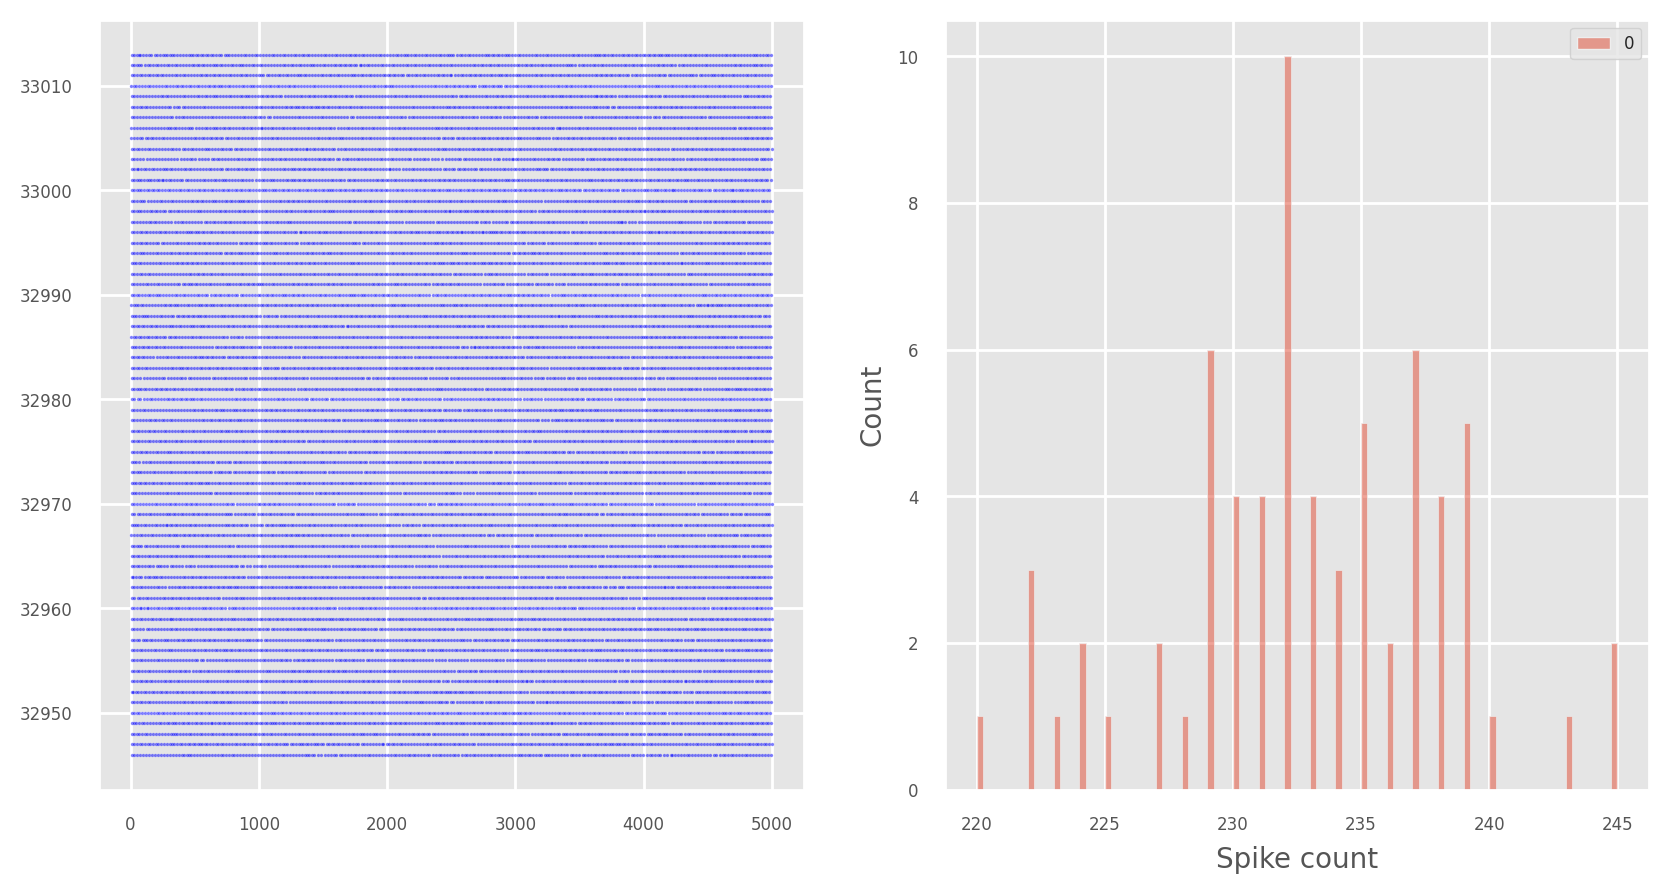

In [14]:
# plotting spikes and sipke counts
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(x=purkinje_spikes[:, 0], y=purkinje_spikes[:, 1], s=1.5, color='blue', alpha=0.5, ax=axs[0])

spike_counts = np.zeros((num_neurons[0], 1))
unique_ids = np.unique(purkinje_spikes[:, 1])
for i, ids in enumerate(unique_ids):
    spike_counts[i] = np.sum(purkinje_spikes[:, 1] == ids)

sns.histplot(spike_counts, bins=100, color='blue', ax=axs[1])
axs[1].set_xlabel("Spike count")


convolve the spike train with a kernel of a particular shape (e.g., Nawrot et al. (1999)). This convolution produces an estimate where the firing rate at any time is a weighted average of the nearby spikes (the weights being determined by the kernel). A Gaussian shaped kernel is most often used (see, e.g., Kass et al. (2005)),

In [ ]:
print(len(purkinje_spikes.shape))

2


![Pasted image 20241112150250.png](https://prod-files-secure.s3.us-west-2.amazonaws.com/aea81b63-89e1-4a73-9f87-07a2af0186b7/f7773d7b-ba30-42a6-9857-7890dd37fb31/Pasted_image_20241112150250.png)


In [26]:
from scipy.signal import convolve
from scipy.signal.windows import triang


# converting into firing rates using a smoothing gaussian kernel
def gaussian_kernel(x, sigma=10):
    return np.exp(-0.5 * (x / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

def firing_rates(spiking_data : np.array, t_start=None, t_end=None, bin_size=10, sigma=10):
    """
    Calculate firing rates from spiking data
    Arguments:
    - spiking_data: 2D numpy array with shape (N, 2), where N is the number of spikes
        and the first column is spike times and the second column is neuron IDs.
    - time_window: tuple (start_time, end_time) defining the time window for analysis, I will use the
        min and max of the spike times, so the window is the entire time of the simulation
    - bin_size: size of the bins, the time step between evaluation points
    """
    if isinstance(spiking_data, np.ndarray) and len(spiking_data.shape) == 2:
        times = spiking_data[:, 0]
        ids = spiking_data[:, 1]
    else:
        print("Invalid input data format. Expected a 2D numpy array.")
        return None
    
    unique_ids = np.unique(ids)
    num_neurons = len(unique_ids)

    # defining the time window
    if t_start is None or t_end is None:
        t_start, t_end = (np.min(times), np.max(times))

    # creating the time bins
    time_bins = np.arange(t_start, t_end, bin_size) # bin size = 10ms thus every 10ms we will evaluate the firing rate
    num_bins = len(time_bins)
    print("Number of Time bins:", num_bins)

    rates = np.zeros((num_neurons, num_bins)) # shape (num_neurons, num_bins)


    # filtering the spikes of each neuron
    for i, neuron_id in enumerate(unique_ids):
        neuron_spikes = times[ids == neuron_id]

        for j, tau in enumerate(time_bins):
            kernel_values = gaussian_kernel(neuron_spikes - tau, sigma=sigma)
            rates[i, j] = np.sum(kernel_values)
    
    rates = rates * 1000

    return rates, time_bins, unique_ids

f_rates, time_bins, unique_ids = firing_rates(purkinje_spikes, bin_size=0.1, sigma=100)


Number of Time bins: 49932


In [28]:
f_rates.shape

(68, 49932)

In [20]:
from scipy.signal import convolve
from scipy.signal.windows import triang

def compute_firing_rate(spike_times, duration, dt=1.0, sigma=100):
    """
    Compute the instantaneous firing rate from spike times using triangle kernel convolution.


    Parameters:
    - spike_times : array-like (in ms)
    - duration : float, total simulation time in ms
    - dt : float, resolution (ms)
    - sigma : float, half-width of triangle kernel (ms)


    Returns:
    - time : np.ndarray, time axis (ms)
    - rate : np.ndarray, firing rate (Hz)
    """
    time = np.arange(0, duration, dt)
    spike_train = np.zeros_like(time)
    indices = (np.array(spike_times) / dt).astype(int)
    indices = indices[indices < len(spike_train)]
    spike_train[indices] = 1


    kernel_size = int(2 * sigma / dt)
    kernel_size = max(kernel_size, 3)
    kernel = triang(kernel_size)
    kernel /= kernel.sum()


    rate = convolve(spike_train, kernel, mode='same') * (1000.0 / dt)


    return time, rate

time_bins , f_rate = compute_firing_rate(purkinje_spikes[:, 0], duration=time_bins[-1], dt=0.1, sigma=100)


In [21]:
purkinje_spikes

array([[7.6000e+00, 3.2985e+04],
       [8.5000e+00, 3.2977e+04],
       [8.9000e+00, 3.2953e+04],
       ...,
       [4.9911e+03, 3.2951e+04],
       [4.9926e+03, 3.3007e+04],
       [4.9990e+03, 3.2959e+04]])

In [22]:
f_rate

array([1046.36, 1048.58, 1050.8 , ..., 1353.94, 1351.28, 1348.61])

In [23]:
f_rate.shape

(49988,)

In [78]:
time_bins[-1]

np.float64(4999.900000000001)

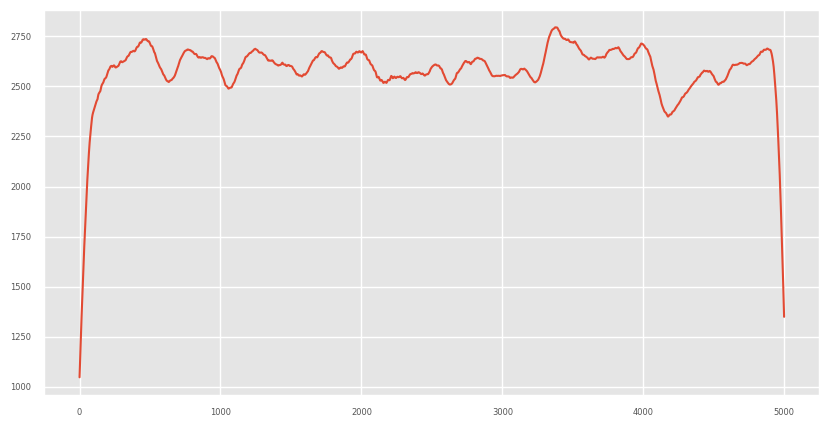

In [24]:
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(time_bins, f_rate)

In [72]:
time_bins.shape

array([0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 4.9985e+03, 4.9990e+03,
       4.9995e+03])

In [43]:
# function for computing the interspike interval
def isi(spiking_data : np.array, t_start=None, t_end=None):
    """

    """
    if isinstance(spiking_data, np.ndarray) and len(spiking_data.shape) == 2:
        times = spiking_data[:, 0]
        ids = spiking_data[:, 1]
    else:
        print("Invalid input data format. Expected a 2D numpy array.")
        return None
    
    unique_ids = np.unique(ids)
    num_neurons = len(unique_ids)

    # defining the time window
    if t_start is None or t_end is None:
        t_start, t_end = (np.min(times), np.max(times))

    isi_dict = {}
    all_isis = []
    
    # sorting the spikes chronologically
    sorted_spikes = np.sort(spiking_data, axis=0)
    for i, n_id in enumerate(unique_ids):
        neuron_spike = times[ids == n_id]
        neuron_spike_sorted = np.sort(neuron_spike)
        neuron_isi = np.diff(neuron_spike_sorted) if len(neuron_spike_sorted) > 1 else np.array([0])
        isi_dict[n_id] = neuron_isi
        all_isis.extend(neuron_isi)

    all_isis = np.array(all_isis)
    if len(all_isis) > 0:
        mean_isi = np.mean(all_isis)
        std_isi = np.std(all_isis)
        min_isi = np.min(all_isis)
        max_isi = np.max(all_isis)
        cv = std_isi / mean_isi if mean_isi > 0 else np.nan
    else:
        mean_isi, std_isi, min_isi, max_isi, cv = np.nan, np.nan, np.nan, np.nan, np.nan
    
    print(f"Coefficient of Variation: {cv:.4f}")
    print(f"Mean ISI: {mean_isi:.4f} +- {std_isi:.4f} ms")
    print(f"Min ISI: {min_isi:.4f} ms, Max ISI: {max_isi:.4f} ms")
    
    stats_dict = {
        "mean": mean_isi,
        "std": std_isi,
        "min": min_isi,
        "max": max_isi,
        "cv": cv,
        "total_count": len(all_isis)
    }
    
    return isi_dict, stats_dict

isi_dict_pc, stats_isi_pc = isi(purkinje_spikes)

Coefficient of Variation: 0.1065
Mean ISI: 21.4937 +- 2.2895 ms
Min ISI: 8.2000 ms, Max ISI: 30.6000 ms


In [25]:
f_rates

array([[23.759209  , 23.77642869, 23.79364601, ..., 22.62761062,
        22.60999913, 22.59238732],
       [25.43345963, 25.45232779, 25.47119413, ..., 25.67762291,
        25.65862131, 25.6396178 ],
       [25.41596698, 25.43445316, 25.4529369 , ..., 23.44834322,
        23.42984422, 23.41134525],
       ...,
       [25.80723717, 25.82658839, 25.84593786, ..., 22.90209384,
        22.88361171, 22.86513013],
       [25.85223432, 25.8710227 , 25.88980861, ..., 24.78866506,
        24.76892763, 24.74918981],
       [27.49423058, 27.51417882, 27.53412381, ..., 24.95310174,
        24.93429598, 24.91548868]])

In [45]:
f_rates[1, :].shape

(500,)

Mean Firing rate: 1564.5969 +- 110.3982
Mean Firing rate (per neuron): ()


ValueError: x and y must have same first dimension, but have shapes (10000,) and (1,)

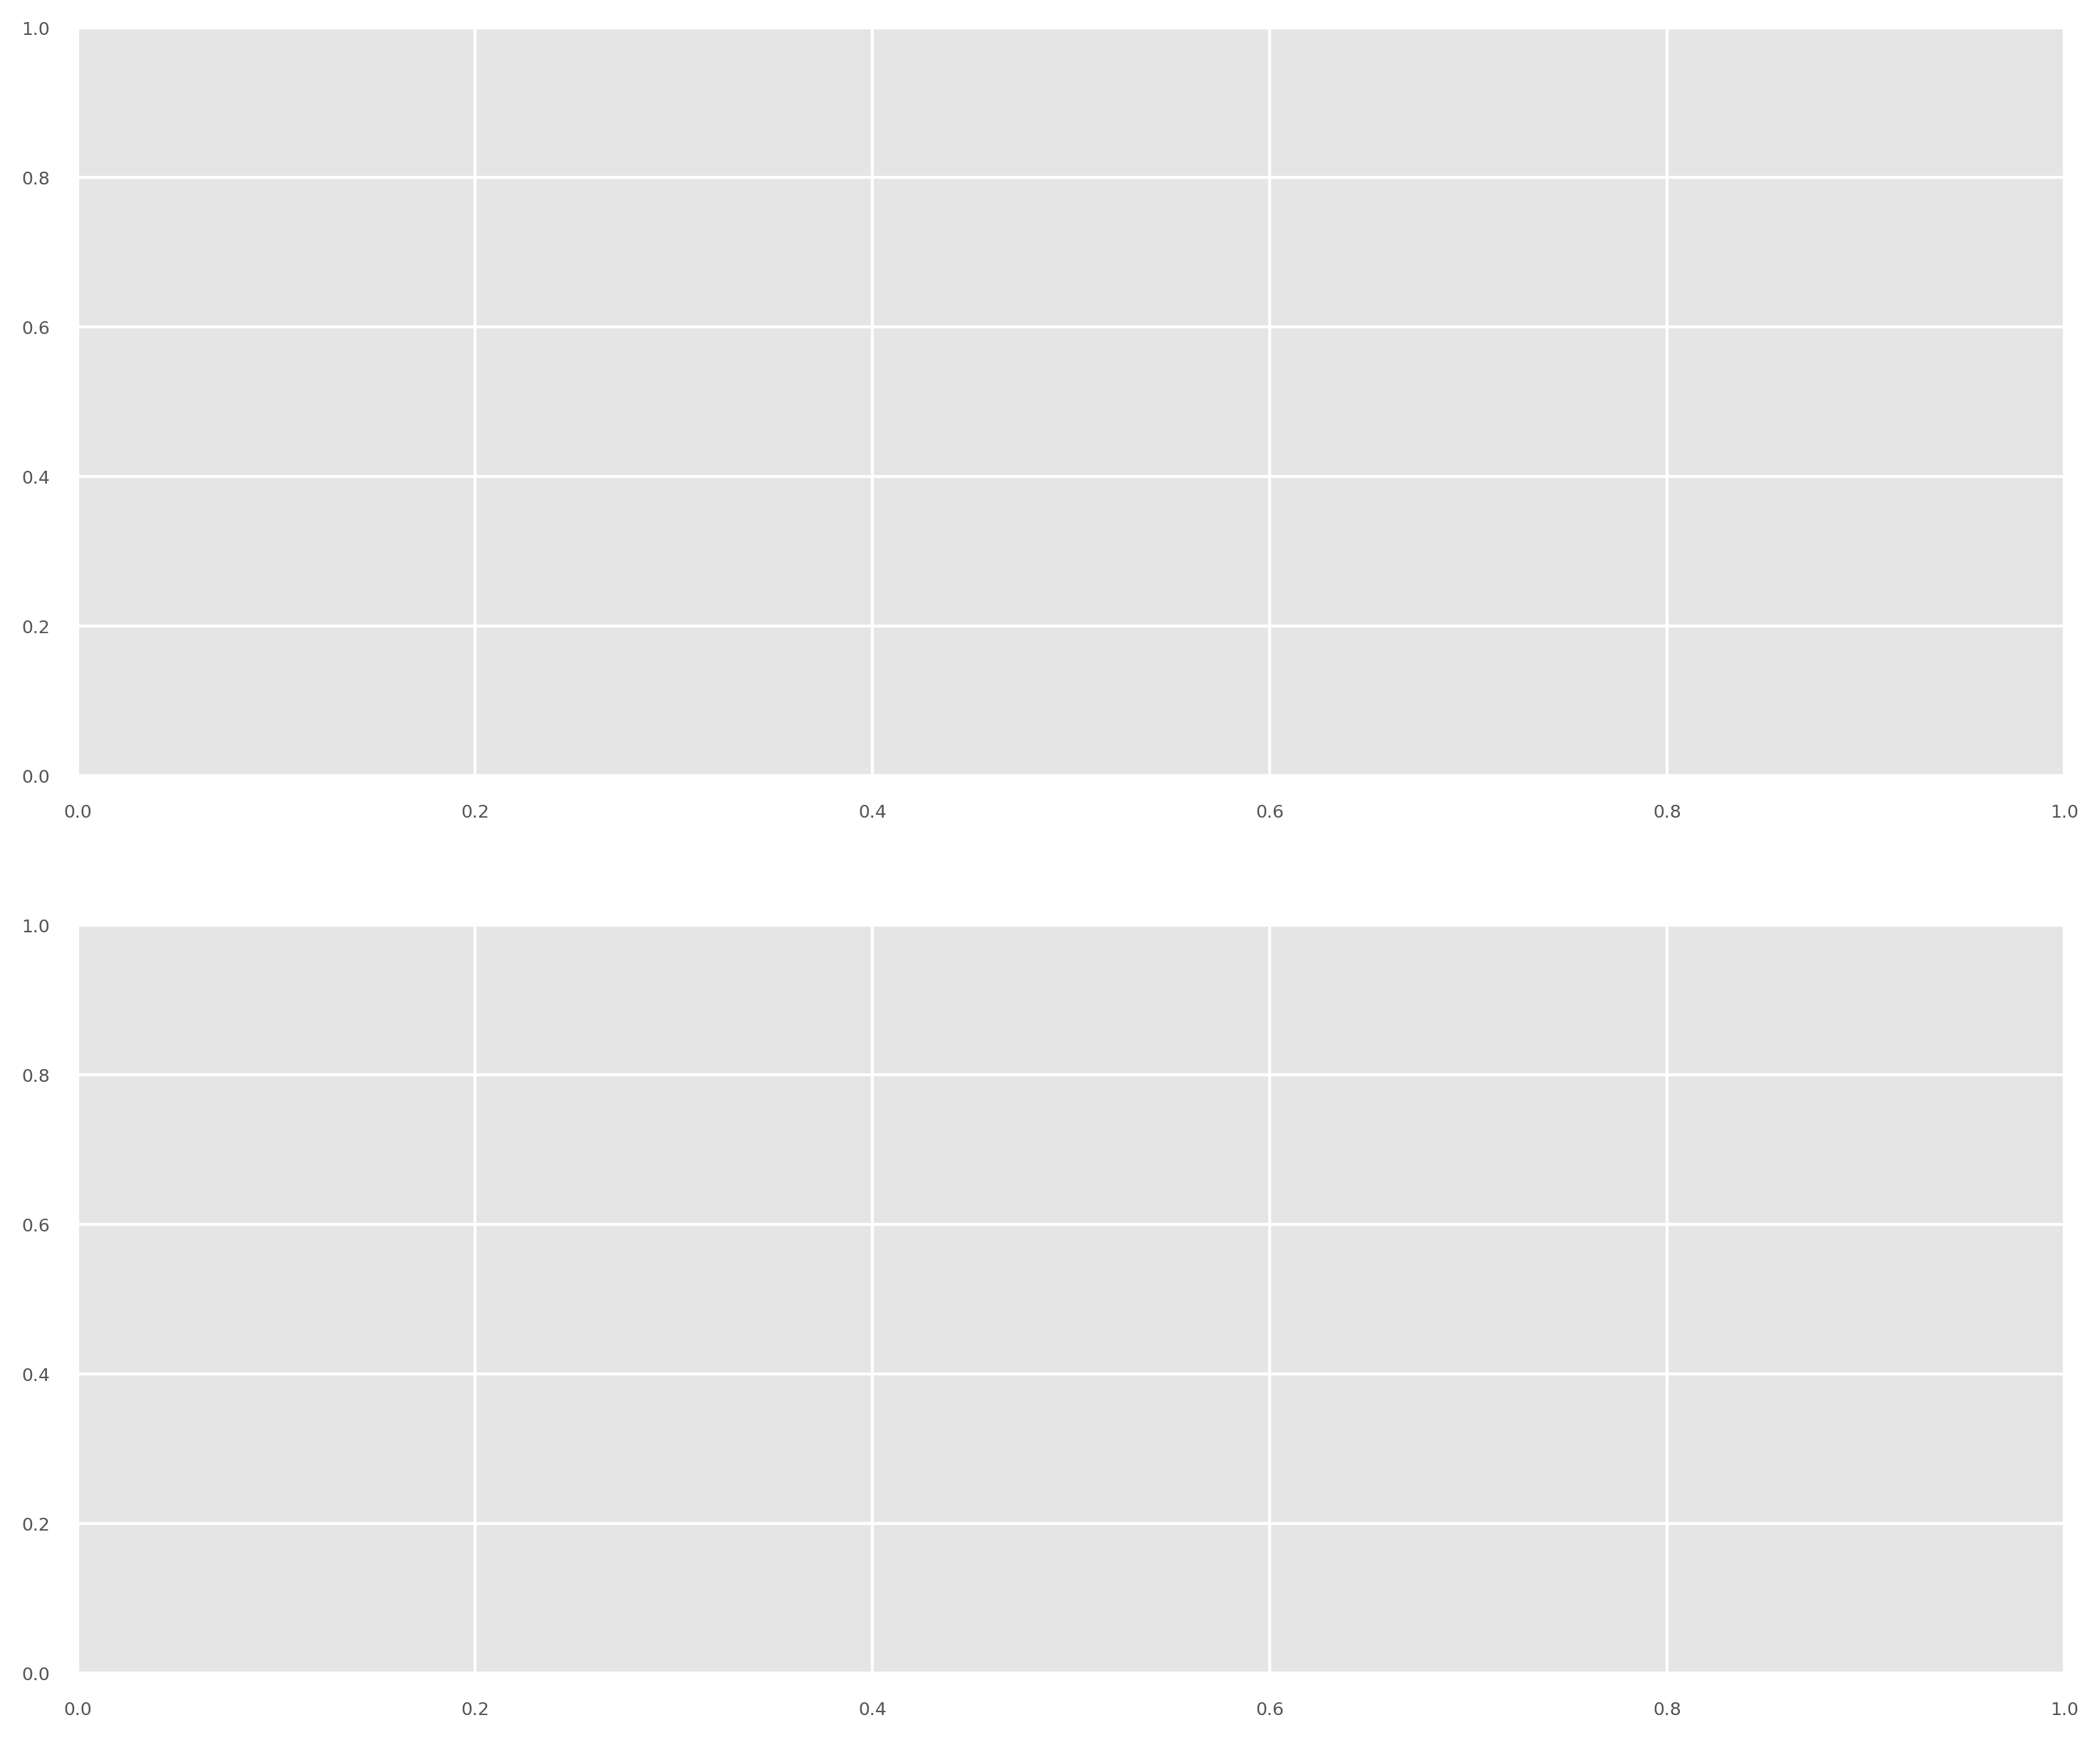

In [71]:
mean_rate = np.mean(f_rate)
std_rate = np.std(f_rate)
mean_firing_rate = np.mean(f_rate, axis=0)
std_firing_rate = np.std(f_rate, axis=0)
print(f"Mean Firing rate: {mean_rate:.4f} +- {std_rate:.4f}")
print(f"Mean Firing rate (per neuron): {mean_firing_rate.shape}")


fig, axs = plt.subplots(2, 1, figsize=(12, 10), dpi=300)
axs[0].plot(time_bins, mean_firing_rate, color='blue', label='Mean Firing Rate')
axs[0].fill_between(time_bins, mean_firing_rate - std_firing_rate, mean_firing_rate + std_firing_rate, color='blue', alpha=0.2, label="STD")
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Firing Rate (Hz)')
axs[0].set_title('Mean Firing Rate with Standard Deviation')
axs[0].legend()

# plotting the inter-spike interval
all_isis = np.concat(list(isi_dict_pc.values()))
sns.histplot(all_isis, bins=100, color='blue', ax=axs[1])
axs[1].set_xlabel('Inter-Spike Interval (ms)')
axs[1].set_ylabel('Count')
axs[1].set_title('Inter-Spike Interval Distribution')
plt.tight_layout()



- Constructing the temporal covariance is essential for the analysis of the spiking activity, it captures how neural activity co-varies between different time points, revealing temporal patterns
- high values on the diagonal, it means that the firing rate at each individual time point has a high variance across neurons. In other words, there is a significant level of fluctuation in the activity at each time bin when compared to its mean
- off diagonal elements capture the covariance between time bins  
- We can know the timescales for which the PCs activity remains correlated
- Difference between baseline fluctuations and stimulus-driven responses

In [29]:
# constructing the temporal covariance matrix

## NORMALIZE
def temporal_covariance(data, spike_counts=False):
    """
    We need to use either the firing rates or the spike times to compute the covariance matrix.
    """

    num_neurons, num_bins = data.shape
    centered_data = data - np.mean(data, axis=0)

    temp_cov = np.zeros((num_bins, num_bins))
    for t1 in range(num_bins):
        for t2 in range(num_bins):
            temp_cov[t1, t2] = np.mean(centered_data[:, t1] * centered_data[:, t2])
    
    return temp_cov

test = temporal_covariance(f_rates)


MemoryError: Unable to allocate 18.6 GiB for an array with shape (49932, 49932) and data type float64

In [48]:
def spatial_covariance(data):
    centered_data = data - np.expand_dims(np.mean(data, axis=1), axis=1)
    
    num_neurons, num_bins = data.shape
    spatial_cov = np.zeros((num_neurons, num_neurons))

    for n1 in range(num_neurons):
        for n2 in range(num_neurons):
            spatial_cov[n1, n2] = np.mean(centered_data[n1] * centered_data[n2])
    
    return spatial_cov

test_spatial = spatial_covariance(f_rates)

<Axes: >

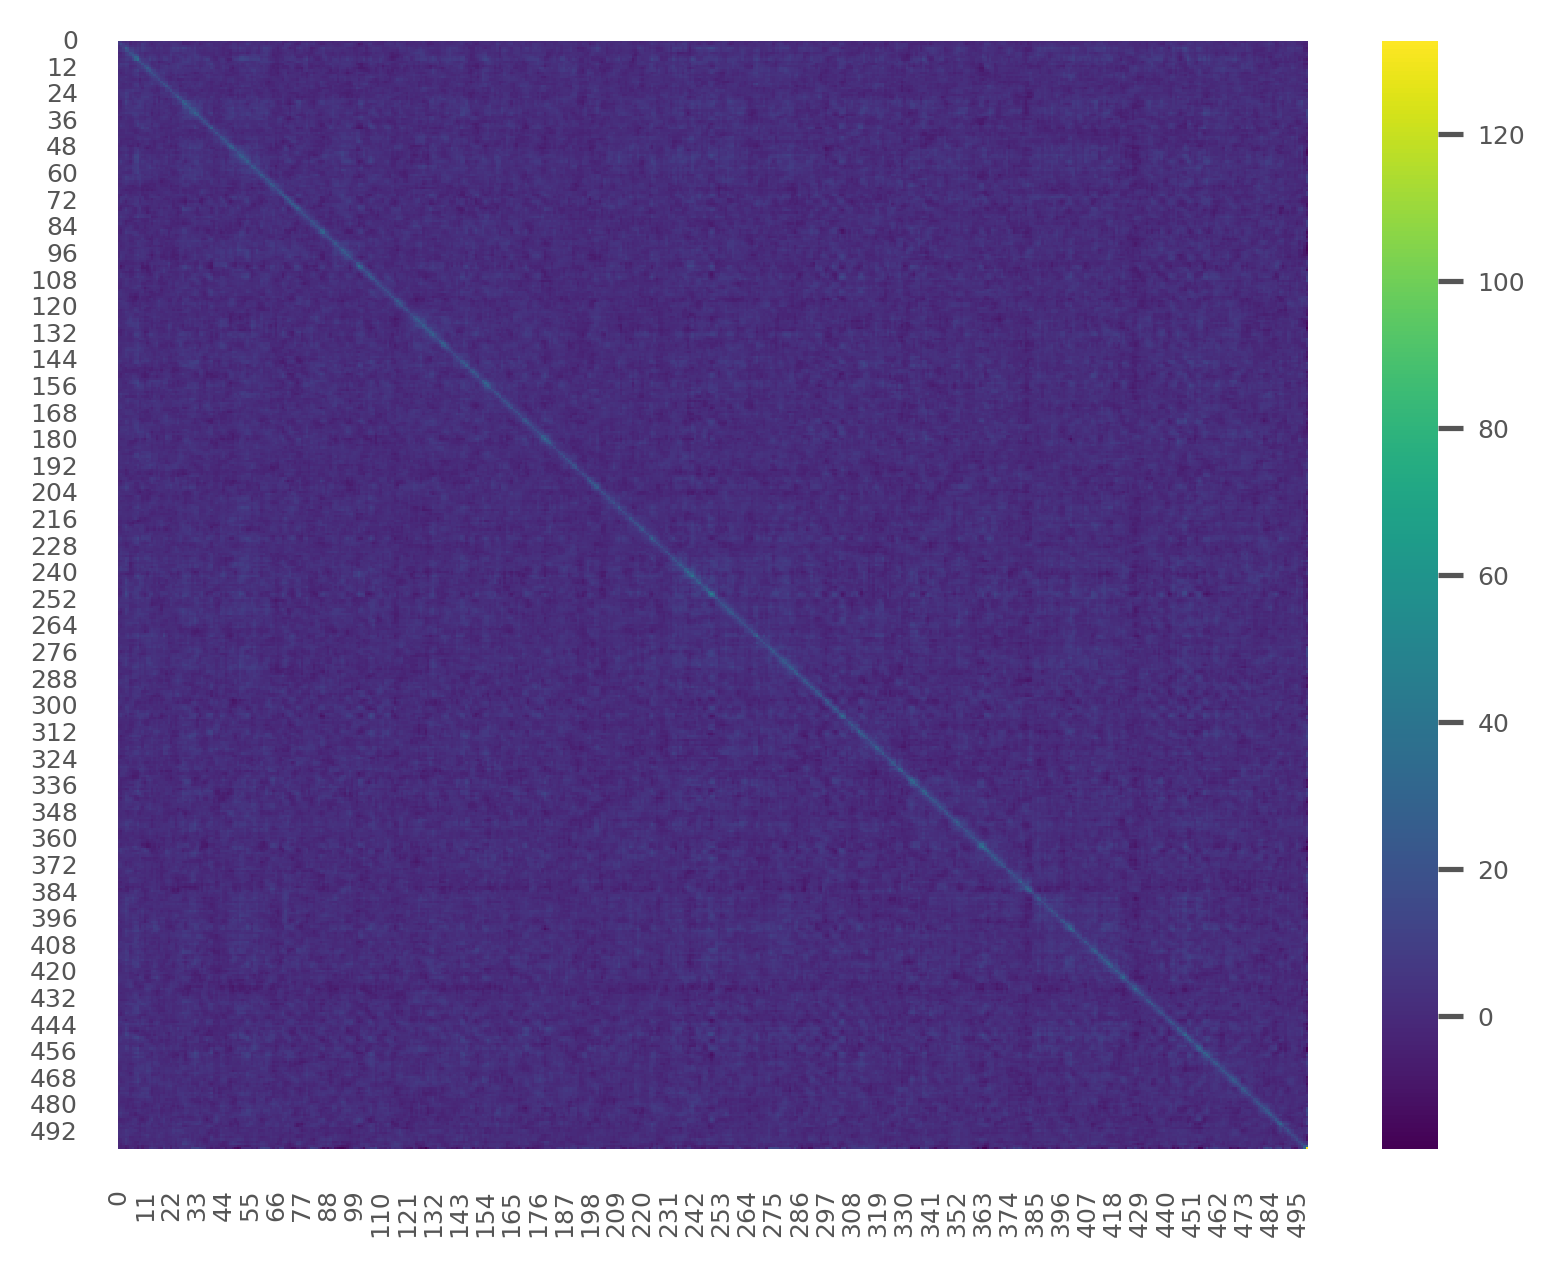

In [49]:
sns.heatmap(test, cmap='viridis', cbar=True)

<Axes: >

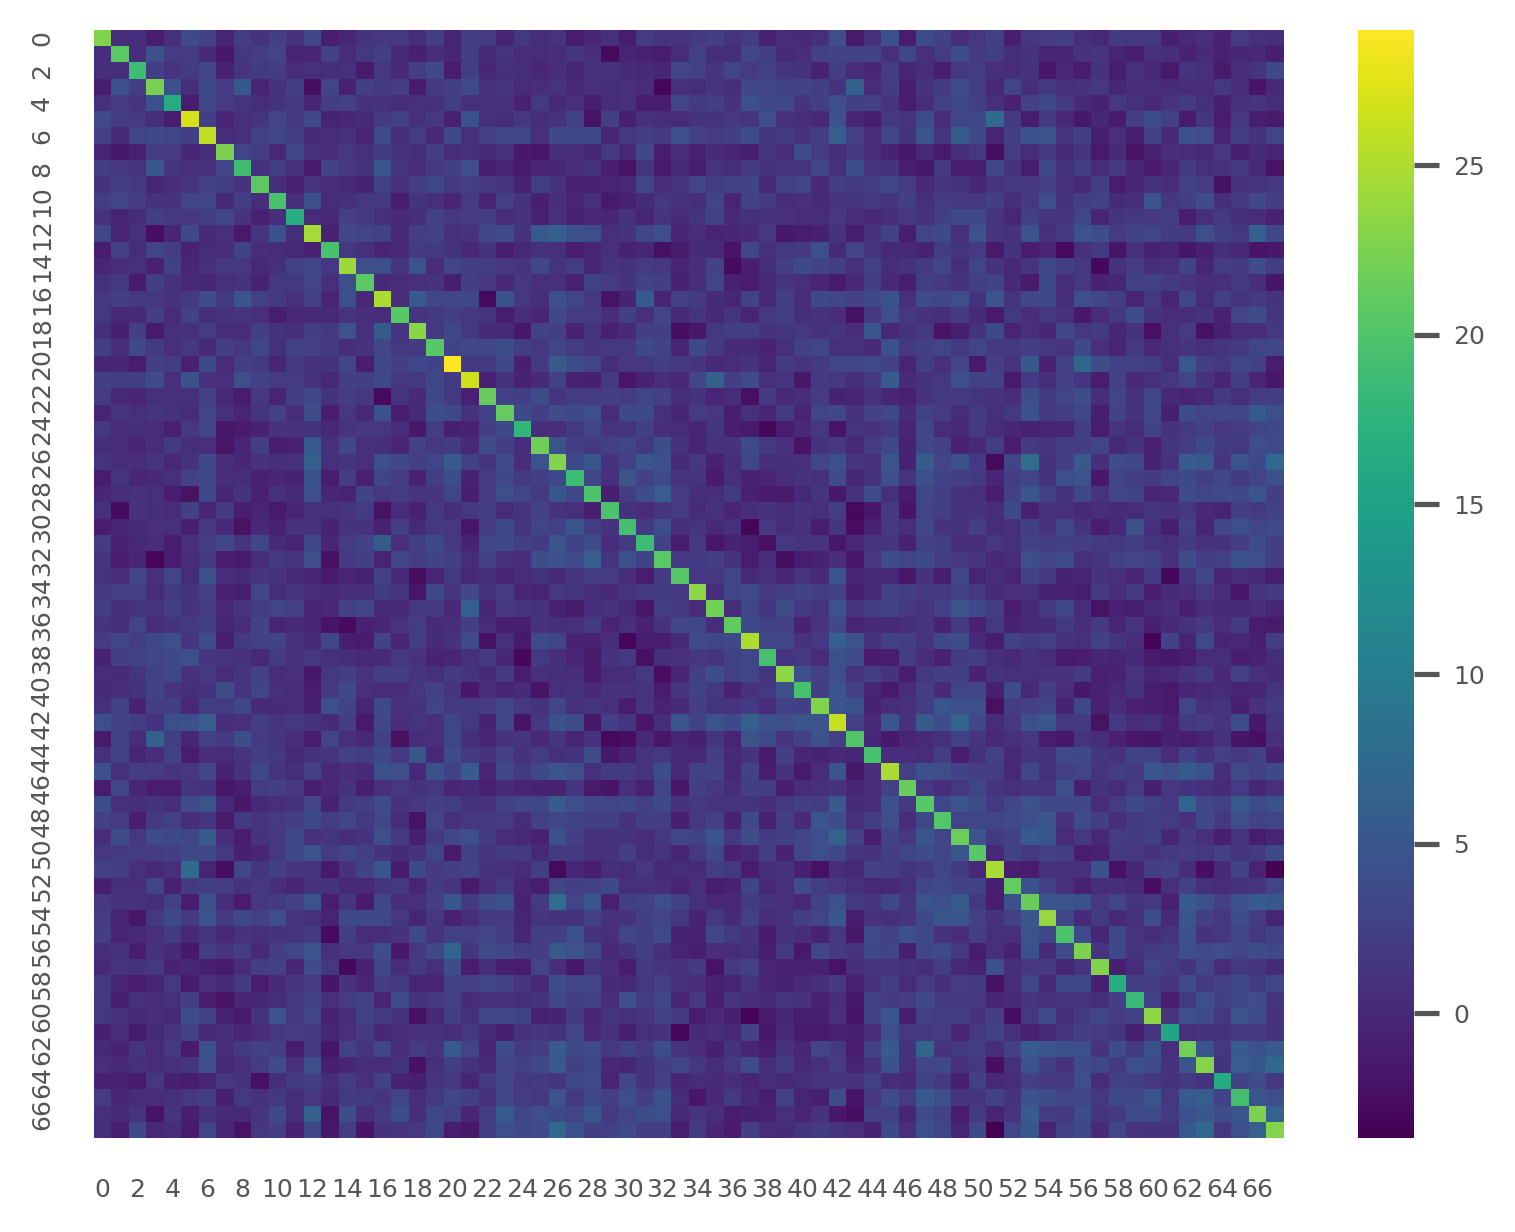

In [50]:
sns.heatmap(test_spatial, cmap='viridis', cbar=True)

The temporal covariance matrix will be influenced by the value of the kernel size as it tells how many neighboring values will be taken into consideration for computing the average, thus a larger sigma qill cotain contributions for longer times
- when the kernel is narrow each time bin is estimated locally, thus it estimates and captures rapid variations (as the gaussian is narrower)
- With the kernel width = 100 we see that there is sustained firing states lasting over 100ms (basal activity)
  - They maintain consistent firing patterns
- The unit of measures are now Hz^2 -> variance in firing rates across neurons
  - Higher values => higher variability (on the diagonal)
  - off-diagonal => how firing rates at 2 different times are related
    - Positive values (+ relation) : increase in t1 => increase in t2 both activities are above average
    - Negative values (- relation) (we cannot use their activities to predict one another)

Number of Time bins: 500
Number of Time bins: 500
Number of Time bins: 500
132.68032145495903
8.400724165097772
4.985291856775373


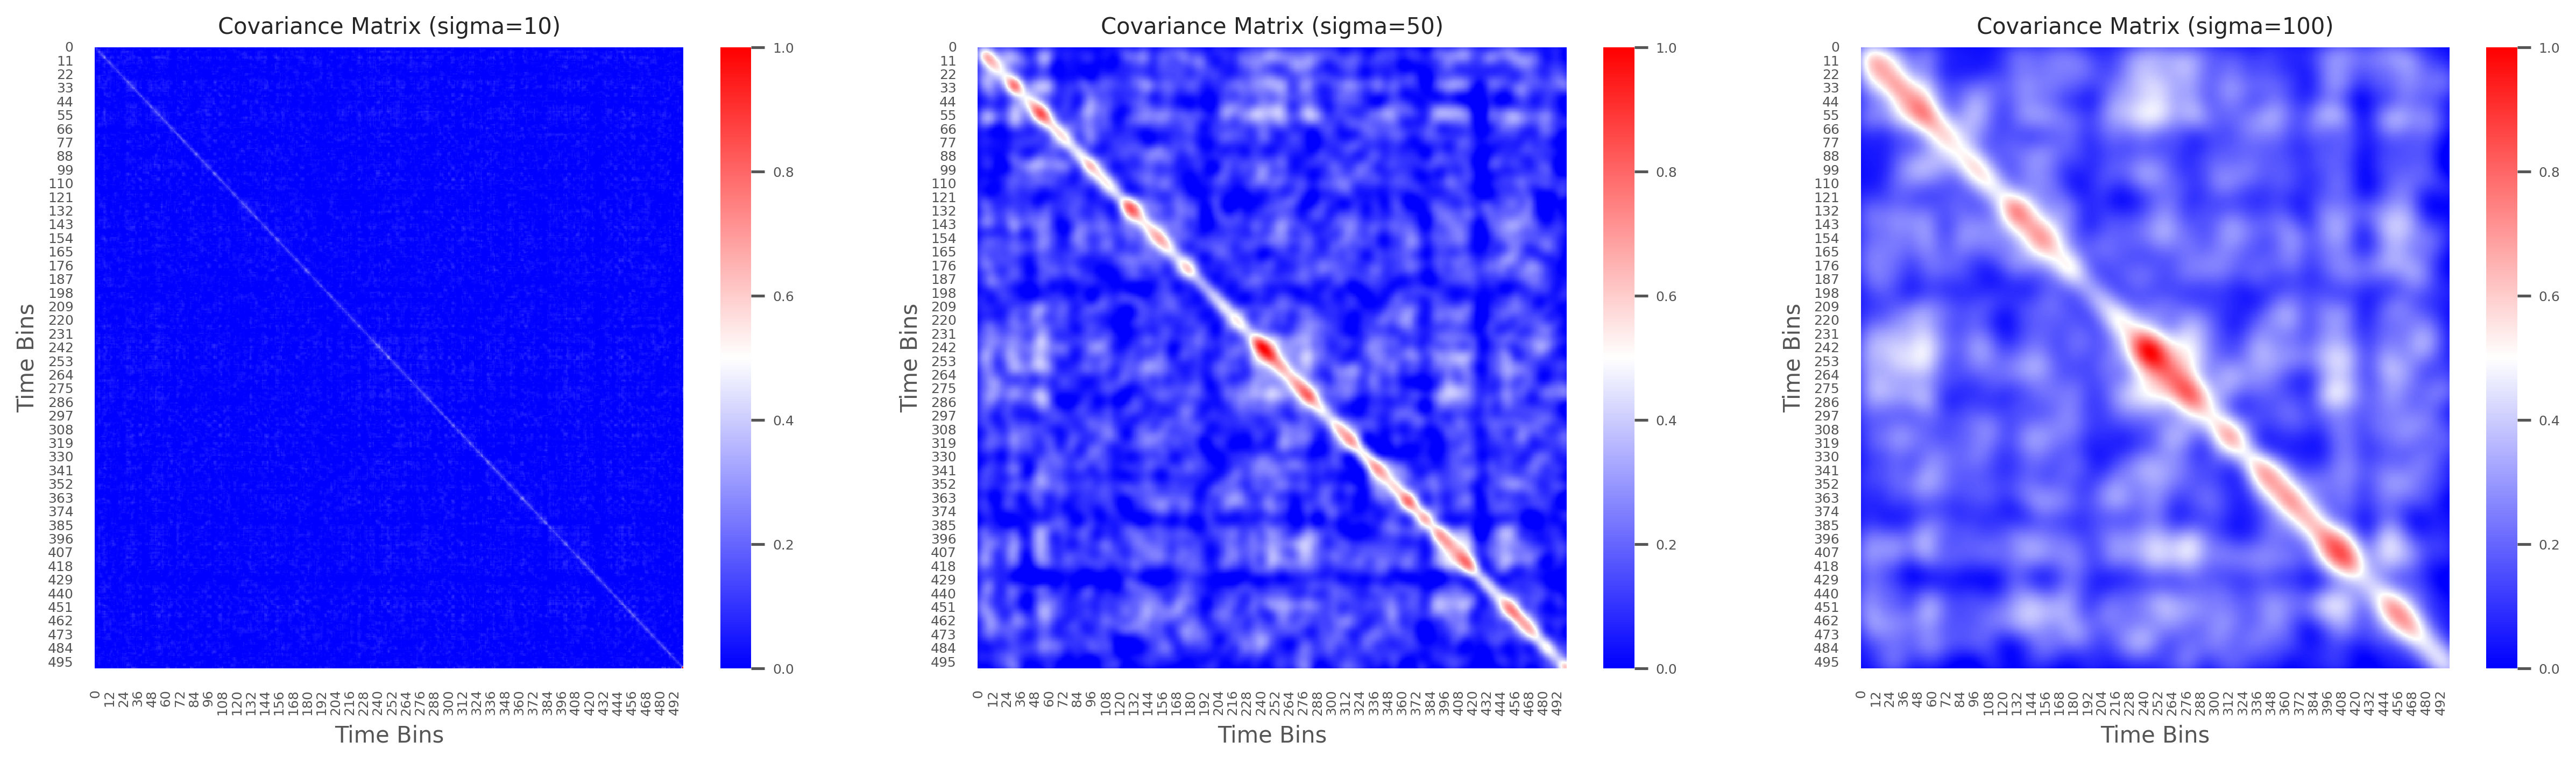

In [98]:
# plotting the covariance matrix for different values of sigma
sigma_values = [10, 50, 100]
cov_matrices = []
for sigma in sigma_values:
    f_rates, _, _ = firing_rates(purkinje_spikes, bin_size=10, sigma=sigma)
    cov_matrix = temporal_covariance(f_rates, spike_counts=False)
    cov_matrices.append(cov_matrix)

fig, axs = plt.subplots(1, len(sigma_values), figsize=(20, 5), dpi=300)
for i, (sigma, cov_matrix) in enumerate(zip(sigma_values, cov_matrices)):
    print(np.max(cov_matrix))
    sns.heatmap(cov_matrix/np.max(cov_matrix), cmap='bwr', cbar=True, ax=axs[i], vmin=0, vmax=1)
    axs[i].set_title(f"Covariance Matrix (sigma={sigma})")
    axs[i].set_xlabel("Time Bins")
    axs[i].set_ylabel("Time Bins")

Seeing a band of high covariance around the diagonal, indicates that the activation is sustained over several adjacent time bins

In [59]:
f_rates_g, _, _  = firing_rates(granule_spikes, bin_size=10, sigma=100)

Number of Time bins: 499


<Axes: >

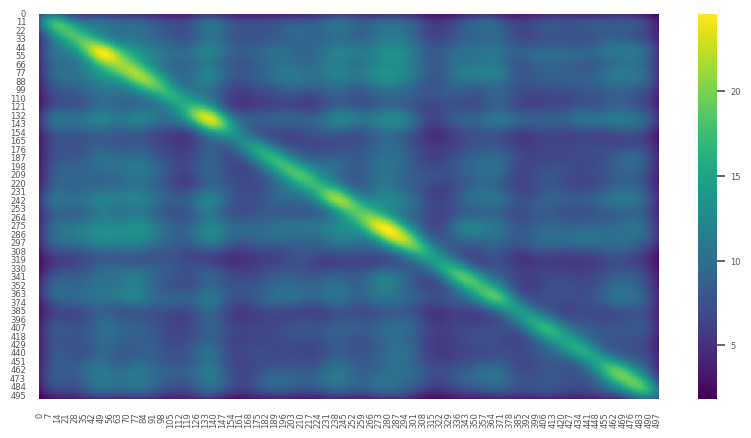

In [100]:
temporal_covariance_g = temporal_covariance(f_rates_g, spike_counts=False)
plt.figure(figsize=(10, 5), dpi=100)
sns.heatmap(temporal_covariance_g, cmap='viridis', cbar=True)

In [ ]:
df_analysis_pc = df_spikes[df_spikes['pop']=='purkinje'][['time_ms', 'sender_id']]
df_analysis_pc

# dataframe -> numpy array
purkinje_spikes = np.array(df_analysis_pc)
print("Shape:", purkinje_spikes.shape) # first column is time, second is cell id
print(purkinje_spikes)

